In [212]:
# import packages
from os import name
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import json

In [213]:
#data set 1
file = "C:\\Users\\Public\\Documents\\Python\\UAS_12220113\\produksi_minyak_mentah.csv"
df = pd.read_csv(file)
df

,kode_negara,tahun,produksi
0,AUS,1971,14226.194
1,AUS,1972,15029.094
2,AUS,1973,18720.577
3,AUS,1974,18498.696
4,AUS,1975,19736.070
...,...,...,...
5834,ZWE,2011,0.000
5835,ZWE,2012,0.000
5836,ZWE,2013,0.000
5837,ZWE,2014,0.000


In [214]:
#data set 2
kode = pd.read_json('C:\\Users\\Public\\Documents\\Python\\UAS_12220113\\kode_negara_lengkap.json')
data = pd.DataFrame(kode, columns= ['name','alpha-3'])
print(data)

                  name alpha-3
0          Afghanistan     AFG
1        Åland Islands     ALA
2              Albania     ALB
3              Algeria     DZA
4       American Samoa     ASM
..                 ...     ...
244  Wallis and Futuna     WLF
245     Western Sahara     ESH
246              Yemen     YEM
247             Zambia     ZMB
248           Zimbabwe     ZWE

[249 rows x 2 columns]


In [215]:
kode_dict = dict(data.values.tolist())
list_kode = list(df['kode_negara'].unique())

list_negara=[]
kode_dict2 = {value:key for key, value in kode_dict.items()}
list_negara = list(map(kode_dict2.get, list_kode))
list_tahun = list(range(1971,2016))
print(list_kode)
print(list_negara)
print(list_tahun)

['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA', 'OEU', 'ALB', 'DZA', 'ARG', 'ARM', 'AZE', 'BGD', 'BLR', 'BIH', 'BRA', 'BRN', 'BGR', 'KHM', 'CHL', 'CHN', 'COL', 'HRV', 'CYP', 'EGY', 'EST', 'ETH', 'GEO', 'GHA', 'HTI', 'HKG', 'IND', 'IDN', 'IRN', 'ISR', 'KAZ', 'LVA', 'LTU', 'MKD', 'MYS', 'MLT', 'MDA', 'MOZ', 'NGA', 'PAK', 'PRY', 'PER', 'PHL', 'ROU', 'RUS', 'SAU', 'SGP', 'SVN', 'ZAF', 'SDN', 'TWN', 'TZA', 'THA', 'UKR', 'ARE', 'URY', 'VNM', 'ZMB', 'WLD', 'SRB', 'MNE', 'EU28', 'G20', 'OECD', 'AGO', 'BHR', 'BEN', 'BOL', 'BWA', 'CMR', 'COG', 'CRI', 'CIV', 'CUB', 'PRK', 'COD', 'DOM', 'ECU', 'SLV', 'ERI', 'GAB', 'GTM', 'HND', 'IRQ', 'JAM', 'JOR', 'KEN', 'KWT', 'KGZ', 'LBN', 'LBY', 'MNG', 'MAR', 'MMR', 'NAM', 'NPL', 'NIC', 'NER', 'OMN', 'PAN', 'QAT', 'SEN', 'LKA', 'SYR', 'TJK', 'TGO', 'TTO', 'TUN', 'TKM', 'UZB', 'VEN', 'YEM', 'ZWE']
['A

In [216]:
#assume
negara = ('Australia')
tahun = 1971
B_besar = 10

In [217]:
if negara in kode_dict.keys():
    group = dict(tuple(df.groupby('kode_negara')))
    df_negara = (group[kode_dict[negara]])
else: print('error')
print(df_negara)

   kode_negara  tahun   produksi
0          AUS   1971  14226.194
1          AUS   1972  15029.094
2          AUS   1973  18720.577
3          AUS   1974  18498.696
4          AUS   1975  19736.070
5          AUS   1976  20177.769
6          AUS   1977  21259.310
7          AUS   1978  20694.803
8          AUS   1979  20828.964
9          AUS   1980  19471.877
10         AUS   1981  19007.475
11         AUS   1982  18706.129
12         AUS   1983  18220.054
13         AUS   1984  22148.899
14         AUS   1985  25468.860
15         AUS   1986  26561.559
16         AUS   1987  26399.764
17         AUS   1988  26322.923
18         AUS   1989  23679.705
19         AUS   1990  26752.604
20         AUS   1991  26717.935
21         AUS   1992  23439.126
22         AUS   1993  22940.108
23         AUS   1994  21286.521
24         AUS   1995  22718.440
25         AUS   1996  20539.570
26         AUS   1997  20494.396
27         AUS   1998  22008.258
28         AUS   1999  16551.631
29        

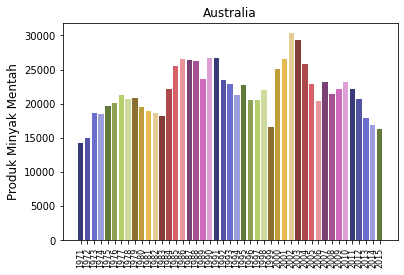

In [218]:
cmap_name = 'tab20b'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len(df_negara['tahun'])]
produksinegara = df_negara['produksi'].tolist()
x = np.arange(len(list_tahun))
fig, ax = plt.subplots()
ax.bar(x, produksinegara, color=colors, label='produksi negara')
ax.set_ylabel("Produk Minyak Mentah", fontsize=12)
ax.set_title(negara)
ax.set_xticks(x)
ax.set_xticklabels(list_tahun, rotation=90, fontsize = 8)
plt.show()

In [219]:

total_produksi = []
for i in list_negara:
    if i not in kode_dict.keys():
        continue
    group = dict(tuple(df.groupby('kode_negara')))
    df_negara = (group[kode_dict[i]])
    jumlah_produksi = df_negara['produksi'].astype(int).sum()
    total_produksi.append(jumlah_produksi)
print(total_produksi)

[983323, 57085, 0, 3973064, 5714, 359065, 0, 75399, 178650, 15284, 66774, 0, 0, 170618, 18573, 406, 0, 5771613, 95629, 61966, 3562696, 21191, 0, 2583, 38226, 124, 0, 125982, 3585340, 16724113, 47208, 2082973, 1318433, 0, 620298, 218, 47492, 0, 2176685, 391486, 4389, 0, 34922, 6422416, 1085190, 29984, 0, 1517335, 0, 0, 2217, 24223, 0, 0, 1242542, 2906820, 8376438, 29385, 1333990, 0, 4606, 0, 1134025, 0, 118, 402, 4457218, 99002, 0, 274741, 18456, 366994, 10702740, 17711742, 0, 17, 7902, 240433, 4081, 0, 197989, 75594, 4334991, 0, 361387, 0, 24857, 0, 1651723, 417384, 3061, 82928, 0, 204485, 386389, 0, 35411, 70682, 0, 50376, 0, 778214, 0, 0, 540496, 22741, 0, 4471424, 0, 85, 0, 4654127, 2229, 0, 3217142, 4619, 576, 42826, 0, 0, 0, 3205, 1523014, 0, 1194524, 17, 0, 740856, 875, 0, 334206, 195860, 206872, 139117, 6573328, 397967, 0]


In [ ]:
produksi_tahun =[]
for i in list_negara:
    if i not in kode_dict.keys():
        continue
    group = dict(tuple(df.groupby('kode_negara')))
    df_negara = (group[kode_dict[i]])
    prodtahun = df_negara.loc[df['tahun'] == tahun]
    produksiterbesar  = prodtahun['produksi'].sum()
    produksi_tahun.append(produksiterbesar)
print(produksi_tahun)

[14226.194, 2628.081, 0.0, 67007.824, 34.93, 0.0, 0.0, 1861.644, 7723.824, 0.0, 1944.414, 0.0, 0.0, 1254.013, 763.351, 0.0, 0.0, 23640.056, 1748.102, 0.0, 287.213, 396.245, 0.0, 158.666, 127.38, 0.0, 0.0, 3528.843, 97.337, 482149.55, 1657.0, 38101.314, 21908.076, 0.0, 0.0, 0.0, 0.0, 0.0, 8520.78, 6474.126, 310.493, 0.0, 1561.086, 40119.734, 11227.193, 0.0, 0.0, 15201.432, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7459.561, 44946.941, 230174.161, 5829.823, 0.0, 0.0, 0.0, 0.0, 3341.492, 0.0, 0.0, 0.0, 77109.593, 417.384, 0.0, 3172.23, 0.0, 13390.095, 0.0, 241141.895, 0.0, 0.0, 0.0, 0.0, 112.331, 0.0, 13.234, 0.0, 51909.402, 0.0, 0.0, 0.0, 0.0, 0.0, 5841.11, 9909.216, 0.0, 1959.238, 0.0, 0.0, 15.375, 0.0, 0.0, 118.424, 0.0, 0.0, 0.0, 181.544, 0.0, 0.0, 5889.182, 0.0, 0.0, 85181.19, 0.0, 0.0, 0.0, 155964.539, 0.0, 0.0, 136070.985, 0.0, 21.39, 879.852, 0.0, 0.0, 0.0, 0.0, 15058.133, 0.0, 21202.2, 0.0, 0.0, 5310.096, 0.0, 0.0, 6513.124, 4232.266, 0.0, 0.0, 197992.167, 0.0, 0.0]


In [ ]:
newdata = pd.DataFrame(kode, columns= ['name','alpha-3','region','sub-region'])
newdata2 = newdata[newdata['alpha-3'].isin(list_kode)]
print(newdata2)

                                   name alpha-3    region  \
2                               Albania     ALB    Europe   
3                               Algeria     DZA    Africa   
6                                Angola     AGO    Africa   
10                            Argentina     ARG  Americas   
11                              Armenia     ARM      Asia   
..                                  ...     ...       ...   
240  Venezuela (Bolivarian Republic of)     VEN  Americas   
241                            Viet Nam     VNM      Asia   
246                               Yemen     YEM      Asia   
247                              Zambia     ZMB    Africa   
248                            Zimbabwe     ZWE    Africa   

                          sub-region  
2                    Southern Europe  
3                    Northern Africa  
6                 Sub-Saharan Africa  
10   Latin America and the Caribbean  
11                      Western Asia  
..                               

In [ ]:
prodtahun = df.loc[df['tahun'] == tahun]
prodtahun4 = prodtahun.loc[prodtahun['produksi'] == 0]
kodenegara0 = prodtahun4['kode_negara'].tolist()
datanegara0 = newdata[newdata['alpha-3'].isin(kodenegara0)]
namanegara0 = datanegara0['name'].tolist()
kumulatifnegara0=[]
for i in namanegara0:
    if i not in kode_dict.keys():
        continue
    group = dict(tuple(df.groupby('kode_negara')))
    df_negara = (group[kode_dict[i]])
    negara0 = df_negara['produksi'].astype(int).sum()
    kumulatifnegara0.append(negara0)
datanegara0['kumulatif produksi'] = kumulatifnegara0
datanegara0.rename(columns={'name':'negara','alpha-3':'kode Negara'}, inplace=True)
print(datanegara0)

                                      negara kode Negara    region  \
18                                Bangladesh         BGD      Asia   
21                                   Belgium         BEL    Europe   
23                                     Benin         BEN    Africa   
39                                  Cameroon         CMR    Africa   
51         Congo, Democratic Republic of the         COD    Africa   
53                                Costa Rica         CRI  Americas   
54                             Côte d'Ivoire         CIV    Africa   
58                                    Cyprus         CYP      Asia   
60                                   Denmark         DNK    Europe   
63                        Dominican Republic         DOM  Americas   
66                               El Salvador         SLV  Americas   
71                                  Ethiopia         ETH    Africa   
75                                   Finland         FIN    Europe   
84                  

C:\Users\s\AppData\Local\Temp/ipykernel_28192/34629507.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanegara0['kumulatif produksi'] = kumulatifnegara0
C:\Users\s\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


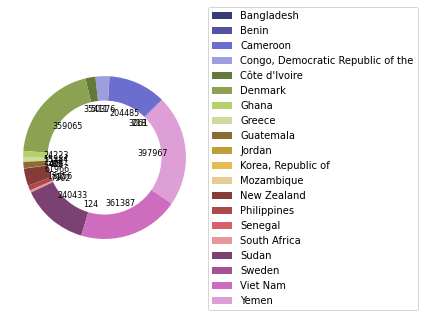

In [ ]:
kumulatif0 = datanegara0[datanegara0['kumulatif produksi']>.001]['kumulatif produksi'].tolist()
kumulatifga0 = datanegara0[datanegara0['kumulatif produksi'].isin(kumulatif0)]
negarayg0 = kumulatifga0['negara'].tolist()
kumulatifprodga0 = kumulatifga0['kumulatif produksi'].tolist()
colors = cmap.colors[:len(kumulatifprodga0)]
fig, ax = plt.subplots()
def label_function(val):
    return f'{val / 100 * sum(kumulatifprodga0):.0f}'
patches, labels, texts = ax.pie(kumulatifprodga0, autopct=label_function, startangle=45, colors = colors, textprops={'fontsize': 8})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
ax.legend(patches, negarayg0 , loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()